# <font face = 'Impact' color = '#FFAEBC' > Sample Demonstration on Machine Learning for Regression<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> License: GPL v3.0<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
This notebook provides a backgrounder in doing Machine Learning in Python employing models such as Ridge Regression, LASSO Regression, Elastic Net, and Random Forest Regressor.

#### <font face = 'Times New Roman' color = '#B5E5CF'> Name of Business Analyst: Write your name here<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> Date of Accomplishment: Indicate here<font/>

# <font face = 'Palatino Linotype' color = '#5885AF'> Business Understanding:<font/>

The organization seeks to understand and predict the financial health and creditworthiness of businesses in order to make informed lending and investment decisions. Specifically, the objective is to predict a company’s CreditRiskScore — a quantitative measure of the likelihood of default or financial instability — based on historical financial, operational, and regional characteristics.

The dataset provided contains information on companies’ financial performance (AnnualRevenue, ProfitMargin), size and operational history (NumEmployees, YearsInOperation), prior financial behavior (HasPreviousDefaults, AvgMonthlyDebtObligation, CurrentLoanAmount), asset backing (CollateralValue), quality of financial reporting (FinancialStatementQuality), and contextual factors such as Industry and Region.

By building a regression model using these predictor variables, the organization aims to:
- Identify the key drivers of credit risk.
- Quantify the relationship between company characteristics and creditworthiness.
- Support data-driven lending decisions, risk assessment, and portfolio management.
- Reduce the likelihood of loan defaults and optimize capital allocation.

The business goal is therefore to develop a predictive model that accurately estimates the CreditRiskScore for each company, enabling management to make strategic financial decisions with greater confidence.

In [17]:
# Load the necessary packages
# Load the necessary libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import joblib
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [8]:
#Checking out the current working directory
print(os.getcwd())

/content


In [9]:
os.chdir('/content/sample_data')

In [18]:
# Load your dataset
df = pd.read_excel("credit_risk_score.xlsx")
# Check out the first few records
df.head()

,AnnualRevenue,ProfitMargin,NumEmployees,YearsInOperation,Industry,HasPreviousDefaults,AvgMonthlyDebtObligation,CurrentLoanAmount,CollateralValue,FinancialStatementQuality,Region,CreditRiskScore
0,5.372018e+06,16.996777,48,19,Healthcare,0,20384.398702,579814.337716,825939.405284,5,West,10.554537
1,2.846884e+06,14.623168,47,26,Manufacturing,0,29319.250061,507097.856107,93672.826723,4,East,67.298342
2,6.247479e+06,10.298152,50,26,Healthcare,0,22538.061802,548087.263041,809158.936975,3,North,11.682366
3,1.499204e+07,6.765316,37,25,Healthcare,1,14843.385363,767623.082354,932309.562351,5,North,0.000000
4,2.586579e+06,13.491117,57,26,Finance,0,4870.969105,501459.017855,54753.956543,3,North,68.996762


# <font face = 'Palatino Linotype' color = '#5885AF'> Data Understanding:<font/>
Provide a solid data understanding section for this mini-project.

===== Dataset Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AnnualRevenue              5 non-null      float64
 1   ProfitMargin               5 non-null      float64
 2   NumEmployees               5 non-null      int64  
 3   YearsInOperation           5 non-null      int64  
 4   Industry                   5 non-null      object 
 5   HasPreviousDefaults        5 non-null      int64  
 6   AvgMonthlyDebtObligation   5 non-null      float64
 7   CurrentLoanAmount          5 non-null      float64
 8   CollateralValue            5 non-null      float64
 9   FinancialStatementQuality  5 non-null      int64  
 10  Region                     5 non-null      object 
 11  CreditRiskScore            5 non-null      float64
dtypes: float64(6), int64(4), object(2)
memory usage: 612.0+ bytes

===== Summary Statisti

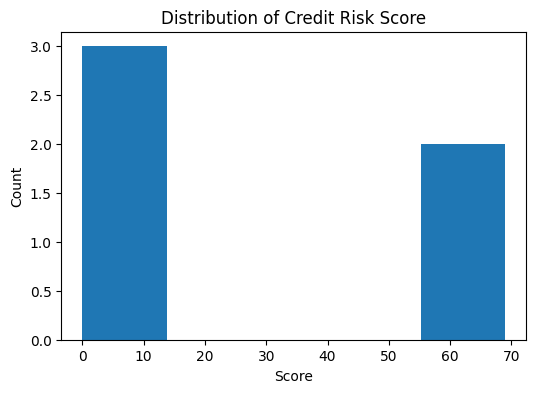

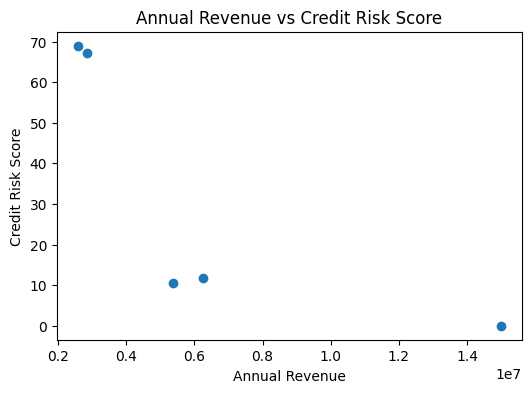

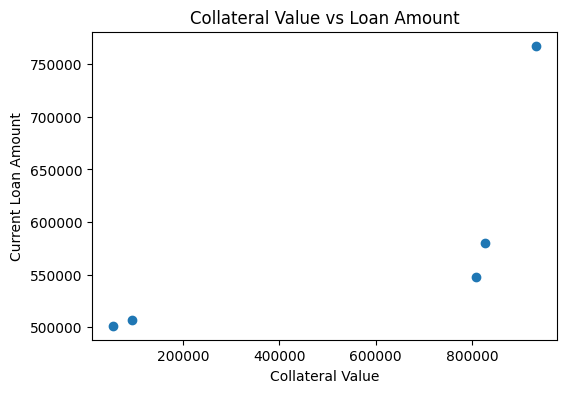

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1. LOAD DATA (replace with path)
# -------------------------------
# Example: df = pd.read_csv("your_file.csv")
# For demonstration, manually creating the dataframe you provided:

data = {
    "AnnualRevenue": [5.372018e+06, 2.846884e+06, 6.247479e+06, 1.499204e+07, 2.586579e+06],
    "ProfitMargin": [16.996777, 14.623168, 10.298152, 6.765316, 13.491117],
    "NumEmployees": [48, 47, 50, 37, 57],
    "YearsInOperation": [19, 26, 26, 25, 26],
    "Industry": ["Healthcare", "Manufacturing", "Healthcare", "Healthcare", "Finance"],
    "HasPreviousDefaults": [0, 0, 0, 1, 0],
    "AvgMonthlyDebtObligation": [20384.40, 29319.25, 22538.06, 14843.39, 4870.97],
    "CurrentLoanAmount": [579814.34, 507097.85, 548087.26, 767623.08, 501459.01],
    "CollateralValue": [825939.40, 93672.82, 809158.93, 932309.56, 54753.95],
    "FinancialStatementQuality": [5, 4, 3, 5, 3],
    "Region": ["West", "East", "North", "North", "North"],
    "CreditRiskScore": [10.55, 67.29, 11.68, 0.0, 68.99]
}

df = pd.DataFrame(data)

# -------------------------------
# 2. BASIC INFORMATION
# -------------------------------
print("===== Dataset Info =====")
df.info()

print("\n===== Summary Statistics =====")
print(df.describe(include='all'))

# -------------------------------
# 3. CHECK CATEGORICAL DISTRIBUTION
# -------------------------------
cat_cols = ["Industry", "Region", "HasPreviousDefaults"]

for col in cat_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())

# -------------------------------
# 4. VISUALIZE KEY VARIABLES
# -------------------------------

# Histogram for Credit Risk Score
plt.figure(figsize=(6,4))
plt.hist(df['CreditRiskScore'], bins=5)
plt.title("Distribution of Credit Risk Score")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

# Scatter: Revenue vs Credit Risk
plt.figure(figsize=(6,4))
plt.scatter(df['AnnualRevenue'], df['CreditRiskScore'])
plt.title("Annual Revenue vs Credit Risk Score")
plt.xlabel("Annual Revenue")
plt.ylabel("Credit Risk Score")
plt.show()

# Scatter: Collateral vs Loan
plt.figure(figsize=(6,4))
plt.scatter(df['CollateralValue'], df['CurrentLoanAmount'])
plt.title("Collateral Value vs Loan Amount")
plt.xlabel("Collateral Value")
plt.ylabel("Current Loan Amount")
plt.show()


# <font face = 'Palatino Linotype' color = '#5885AF'> Data Preparation:<font/>
Indicate your recipe for data explorationg and transformation in preparation for modelling.

In [20]:
# ---------------------------------------------------------
# 1. IMPORT LIBRARIES
# ---------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# ---------------------------------------------------------
# 2. LOAD DATA (Replace with your actual file path)
# ---------------------------------------------------------

data = {
    "AnnualRevenue": [5.372018e+06, 2.846884e+06, 6.247479e+06, 1.499204e+07, 2.586579e+06],
    "ProfitMargin": [16.996777, 14.623168, 10.298152, 6.765316, 13.491117],
    "NumEmployees": [48, 47, 50, 37, 57],
    "YearsInOperation": [19, 26, 26, 25, 26],
    "Industry": ["Healthcare", "Manufacturing", "Healthcare", "Healthcare", "Finance"],
    "HasPreviousDefaults": [0, 0, 0, 1, 0],
    "AvgMonthlyDebtObligation": [20384.40, 29319.25, 22538.06, 14843.39, 4870.97],
    "CurrentLoanAmount": [579814.34, 507097.85, 548087.26, 767623.08, 501459.01],
    "CollateralValue": [825939.40, 93672.82, 809158.93, 932309.56, 54753.95],
    "FinancialStatementQuality": [5, 4, 3, 5, 3],
    "Region": ["West", "East", "North", "North", "North"],
    "CreditRiskScore": [10.55, 67.29, 11.68, 0.0, 68.99]
}

df = pd.DataFrame(data)

print("==== Raw Data ====")
display(df)

# ---------------------------------------------------------
# 3. CHECK DATA TYPES & MISSING VALUES
# ---------------------------------------------------------

print("\n==== Dataset Info ====")
df.info()

print("\n==== Missing Values ====")
print(df.isnull().sum())

# ---------------------------------------------------------
# 4. OUTLIER DETECTION (Simple IQR Example)
# ---------------------------------------------------------

def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5*IQR) | (df[column] > Q3 + 1.5*IQR)]
    return outliers

numeric_cols = [
    "AnnualRevenue", "ProfitMargin", "NumEmployees", "YearsInOperation",
    "AvgMonthlyDebtObligation", "CurrentLoanAmount", "CollateralValue"
]

print("\n==== Outliers Detected ====")
for col in numeric_cols:
    outliers = detect_outliers_iqr(col)
    print(f"{col}: {len(outliers)} outliers")

# ---------------------------------------------------------
# 5. FEATURE ENGINEERING
# ---------------------------------------------------------

df["DebtServiceCoverageRatio"] = df["AnnualRevenue"] / (df["AvgMonthlyDebtObligation"] * 12)
df["CollateralCoverageRatio"] = df["CollateralValue"] / df["CurrentLoanAmount"]
df["ProfitValue"] = df["AnnualRevenue"] * (df["ProfitMargin"] / 100)

# Optional: Firm age category
df["FirmAgeBucket"] = pd.cut(
    df["YearsInOperation"],
    bins=[0, 5, 10, 20, 100],
    labels=["0-5", "5-10", "10-20", "20+"]
)

print("\n==== After Feature Engineering ====")
display(df)

# ---------------------------------------------------------
# 6. LOG TRANSFORM SKEWED VARIABLES
# ---------------------------------------------------------

skewed_cols = [
    "AnnualRevenue", "AvgMonthlyDebtObligation",
    "CurrentLoanAmount", "CollateralValue", "ProfitValue"
]

for col in skewed_cols:
    df[f"log_{col}"] = np.log1p(df[col])

print("\n==== After Log Transformations ====")
display(df)

# ---------------------------------------------------------
# 7. PREPARE FEATURES AND TARGET
# ---------------------------------------------------------

X = df.drop("CreditRiskScore", axis=1)
y = df["CreditRiskScore"]

categorical_cols = ["Industry", "Region", "FirmAgeBucket"]
numeric_features = X.drop(categorical_cols, axis=1).columns.tolist()

# ---------------------------------------------------------
# 8. PREPROCESSING PIPELINE
# ---------------------------------------------------------

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

print("\n==== Preprocessing Pipeline Ready ====")

# ---------------------------------------------------------
# 9. TRAIN-TEST SPLIT
# ---------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain size:", X_train.shape)
print("Test size:", X_test.shape)

# ---------------------------------------------------------
# 10. APPLY TRANSFORMATIONS
# ---------------------------------------------------------

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\n==== Processed Training Data Shape ====")
print(X_train_processed.shape)

print("\n==== Processed Test Data Shape ====")
print(X_test_processed.shape)

print("\nData preparation complete. Ready for modeling!")


==== Raw Data ====


,AnnualRevenue,ProfitMargin,NumEmployees,YearsInOperation,Industry,HasPreviousDefaults,AvgMonthlyDebtObligation,CurrentLoanAmount,CollateralValue,FinancialStatementQuality,Region,CreditRiskScore
0,5372018.0,16.996777,48,19,Healthcare,0,20384.40,579814.34,825939.40,5,West,10.55
1,2846884.0,14.623168,47,26,Manufacturing,0,29319.25,507097.85,93672.82,4,East,67.29
2,6247479.0,10.298152,50,26,Healthcare,0,22538.06,548087.26,809158.93,3,North,11.68
3,14992040.0,6.765316,37,25,Healthcare,1,14843.39,767623.08,932309.56,5,North,0.00
4,2586579.0,13.491117,57,26,Finance,0,4870.97,501459.01,54753.95,3,North,68.99



==== Dataset Info ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AnnualRevenue              5 non-null      float64
 1   ProfitMargin               5 non-null      float64
 2   NumEmployees               5 non-null      int64  
 3   YearsInOperation           5 non-null      int64  
 4   Industry                   5 non-null      object 
 5   HasPreviousDefaults        5 non-null      int64  
 6   AvgMonthlyDebtObligation   5 non-null      float64
 7   CurrentLoanAmount          5 non-null      float64
 8   CollateralValue            5 non-null      float64
 9   FinancialStatementQuality  5 non-null      int64  
 10  Region                     5 non-null      object 
 11  CreditRiskScore            5 non-null      float64
dtypes: float64(6), int64(4), object(2)
memory usage: 612.0+ bytes

==== Missing Values ===

,AnnualRevenue,ProfitMargin,NumEmployees,YearsInOperation,Industry,HasPreviousDefaults,AvgMonthlyDebtObligation,CurrentLoanAmount,CollateralValue,FinancialStatementQuality,Region,CreditRiskScore,DebtServiceCoverageRatio,CollateralCoverageRatio,ProfitValue,FirmAgeBucket
0,5372018.0,16.996777,48,19,Healthcare,0,20384.40,579814.34,825939.40,5,West,10.55,21.961312,1.424489,9.130699e+05,10-20
1,2846884.0,14.623168,47,26,Manufacturing,0,29319.25,507097.85,93672.82,4,East,67.29,8.091624,0.184723,4.163046e+05,20+
2,6247479.0,10.298152,50,26,Healthcare,0,22538.06,548087.26,809158.93,3,North,11.68,23.099737,1.476332,6.433749e+05,20+
3,14992040.0,6.765316,37,25,Healthcare,1,14843.39,767623.08,932309.56,5,North,0.00,84.167880,1.214541,1.014259e+06,20+
4,2586579.0,13.491117,57,26,Finance,0,4870.97,501459.01,54753.95,3,North,68.99,44.251607,0.109189,3.489584e+05,20+



==== After Log Transformations ====


,AnnualRevenue,ProfitMargin,NumEmployees,YearsInOperation,Industry,HasPreviousDefaults,AvgMonthlyDebtObligation,CurrentLoanAmount,CollateralValue,FinancialStatementQuality,...,CreditRiskScore,DebtServiceCoverageRatio,CollateralCoverageRatio,ProfitValue,FirmAgeBucket,log_AnnualRevenue,log_AvgMonthlyDebtObligation,log_CurrentLoanAmount,log_CollateralValue,log_ProfitValue
0,5372018.0,16.996777,48,19,Healthcare,0,20384.40,579814.34,825939.40,5,...,10.55,21.961312,1.424489,9.130699e+05,10-20,15.496714,9.922574,13.270465,13.624278,13.724569
1,2846884.0,14.623168,47,26,Manufacturing,0,29319.25,507097.85,93672.82,4,...,67.29,8.091624,0.184723,4.163046e+05,20+,14.861736,10.286034,13.136461,11.447574,12.939175
2,6247479.0,10.298152,50,26,Healthcare,0,22538.06,548087.26,809158.93,3,...,11.68,23.099737,1.476332,6.433749e+05,20+,15.647689,10.023005,13.214192,13.603752,13.374484
3,14992040.0,6.765316,37,25,Healthcare,1,14843.39,767623.08,932309.56,5,...,0.00,84.167880,1.214541,1.014259e+06,20+,16.523030,9.605377,13.551055,13.745421,13.829670
4,2586579.0,13.491117,57,26,Finance,0,4870.97,501459.01,54753.95,3,...,68.99,44.251607,0.109189,3.489584e+05,20+,14.765847,8.491254,13.125279,10.910623,12.762711



==== Preprocessing Pipeline Ready ====

Train size: (4, 20)
Test size: (1, 20)

==== Processed Training Data Shape ====
(4, 23)

==== Processed Test Data Shape ====
(1, 23)

Data preparation complete. Ready for modeling!


# <font face = 'Palatino Linotype' color = '#5885AF'> Modelling:<font/>
Train models such as Ridge, LASSO, Elastic Net, and Random Forest for this regression problem.
Perform K-fold Cross Validation (depending on the data size and the capacity of your machine, you may choose 5 or 10)
Choose the best model setup after hyperparameter tuning and upon comparison of its CV score. Check for overfitting comparing this to the Train score.
Check out the performance of the best model using the Test Score.

In [21]:
# ------------------------------------------------------------
# 1. IMPORT LIBRARIES
# ------------------------------------------------------------
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

# ------------------------------------------------------------
# 2. SETUP K-FOLD CROSS VALIDATION
# ------------------------------------------------------------
k = 4  # changed from 5 to 4 because n_samples=4
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# ------------------------------------------------------------
# 3. DEFINE MODELS + HYPERPARAMETER GRIDS
# ------------------------------------------------------------

ridge = Ridge()
lasso = Lasso(max_iter=10000)
elastic = ElasticNet(max_iter=10000)
rf = RandomForestRegressor(random_state=42)

param_grid_ridge = {"alpha": [0.01, 0.1, 1, 10, 100]}
param_grid_lasso = {"alpha": [0.001, 0.01, 0.1, 1, 10]}
param_grid_elastic = {
    "alpha": [0.01, 0.1, 1, 10],
    "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]
}
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5]
}

# ------------------------------------------------------------
# 4. GRID SEARCH + CROSS VALIDATION
# ------------------------------------------------------------

models = {
    "Ridge": (ridge, param_grid_ridge),
    "LASSO": (lasso, param_grid_lasso),
    "ElasticNet": (elastic, param_grid_elastic),
    "RandomForest": (rf, param_grid_rf),
}

results = []

for name, (model, params) in models.items():
    print(f"\n==================== {name} ====================")

    grid = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=kf,
        scoring="neg_mean_squared_error", # Changed scoring from 'r2' to 'neg_mean_squared_error'
        n_jobs=-1
    )

    grid.fit(X_train_processed, y_train)

    best_model = grid.best_estimator_
    best_score = grid.best_score_ # This will now be a negative MSE
    train_score = best_model.score(X_train_processed, y_train)
    test_score = best_model.score(X_test_processed, y_test)

    print("Best Params:", grid.best_params_)
    # For display, convert negative MSE to positive RMSE for better interpretability
    print(f"CV Score (RMSE): {np.sqrt(-best_score):.4f}")
    print(f"Train Score (R²): {train_score:.4f}") # Keep R2 for train score as it's typically used
    print(f"Test Score (R²): {test_score:.4f}") # Keep R2 for test score if desired, but be aware of single sample limitations

    # Store results
    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "CV Score (RMSE)": np.sqrt(-best_score), # Store RMSE
        "Train Score (R²)": train_score,
        "Test Score (R²)": test_score
    })

# ------------------------------------------------------------
# 5. CREATE RESULTS TABLE
# ------------------------------------------------------------
results_df = pd.DataFrame(results)
print("\n==================== SUMMARY TABLE ====================\n")
display(results_df)

# ------------------------------------------------------------
# 6. IDENTIFY BEST MODEL BASED ON CV SCORE
# ------------------------------------------------------------
# When using negative MSE, a higher (less negative) score is better. So we still use idxmax.
# But for RMSE, we want the *lowest* value, so we'll use idxmin.
best_model_name = results_df.loc[results_df["CV Score (RMSE)"].idxmin(), "Model"]
print("\n==================== BEST MODEL ====================")
print(f"Best model based on CV Score (RMSE): {best_model_name}")


==================== Ridge ====================
Best Params: {'alpha': 0.01}
CV Score (RMSE): 28.8819
Train Score (R²): 1.0000
Test Score (R²): nan

==================== LASSO ====================
Best Params: {'alpha': 0.1}
CV Score (RMSE): 32.5063
Train Score (R²): 1.0000
Test Score (R²): nan

==================== ElasticNet ====================


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Best Params: {'alpha': 0.01, 'l1_ratio': 0.3}
CV Score (RMSE): 28.7951
Train Score (R²): 1.0000
Test Score (R²): nan

==================== RandomForest ====================
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
CV Score (RMSE): 32.5148
Train Score (R²): 0.8630
Test Score (R²): nan

==================== SUMMARY TABLE ====================



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


,Model,Best Params,CV Score (RMSE),Train Score (R²),Test Score (R²)
0,Ridge,{'alpha': 0.01},28.881892,1.000000,NaN
1,LASSO,{'alpha': 0.1},32.506307,0.999985,NaN
2,ElasticNet,"{'alpha': 0.01, 'l1_ratio': 0.3}",28.795146,0.999999,NaN
3,RandomForest,"{'max_depth': None, 'min_samples_split': 2, 'n...",32.514821,0.862985,NaN



==================== BEST MODEL ====================
Best model based on CV Score (RMSE): ElasticNet


# <font face = 'Palatino Linotype' color = '#5885AF'> Saving the Model for Future Deployment<font/>

In [22]:
# Save the preprocessor
joblib.dump(preprocessor, "preprocessor.pkl")

# Save the best model
joblib.dump(best_model, "best_model.pkl")

print("Model and preprocessor saved successfully!")

# Load saved preprocessor and model
loaded_preprocessor = joblib.load("preprocessor.pkl")
loaded_model = joblib.load("best_model.pkl")

print("Loaded preprocessor and model successfully!")

# Example new input data (replace with real values)
new_data = pd.DataFrame({
    "AnnualRevenue": [3_500_000],
    "ProfitMargin": [12.5],
    "NumEmployees": [45],
    "YearsInOperation": [10],
    "Industry": ["Healthcare"],
    "HasPreviousDefaults": [0],
    "AvgMonthlyDebtObligation": [15000],
    "CurrentLoanAmount": [500000],
    "CollateralValue": [400000],
    "FinancialStatementQuality": [4],
    "Region": ["East"],
    "DebtServiceCoverageRatio": [3_500_000 / (15000 * 12)],
    "CollateralCoverageRatio": [400000 / 500000],
    "ProfitValue": [3_500_000 * 0.125],
    "FirmAgeBucket": ["5-10"],
    "log_AnnualRevenue": [np.log1p(3_500_000)],
    "log_AvgMonthlyDebtObligation": [np.log1p(15000)],
    "log_CurrentLoanAmount": [np.log1p(500000)],
    "log_CollateralValue": [np.log1p(400000)],
    "log_ProfitValue": [np.log1p(3_500_000 * 0.125)]
})

# Preprocess the data using the loaded pipeline
processed_data = loaded_preprocessor.transform(new_data)

# Predict using the loaded model
prediction = loaded_model.predict(processed_data)

print("Predicted Credit Risk Score:", prediction[0])


Model and preprocessor saved successfully!
Loaded preprocessor and model successfully!
Predicted Credit Risk Score: 27.14749999999999
